# Исследование объявлений о продаже квартир

**Исходные данные** - данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет)

**Описание данных:**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

**Цель исследования** - установить параметры, влияющие на рыночную стоимость объектов недвижимости.

**План исследования:**
* Изучить данные.
* Выполнить предобработку данных.
* Добавить в таблицу:
    * Цена одного квадратного метра
    * День недели публикации (0 - понедельник,1 - вторник и т.д.)
    * Месяц публикации объявления
    * Год публикации объявления
    * Тип этажа квартиры (значения — «‎первый», «последний», «другой»)
    * Расстояние до центра города в километрах 
* Провести исследовательский анализ данных
    * Изучить параметры:
      * общая площадь
      *  жилая площадь
      *  площадь кухни
      *  цена объекта
      *  количество комнат
      *  высота потолков
      *  тип этажа квартиры («первый», «последний», «другой»)
      *  общее количество этажей в доме
      *  расстояние до центра города в метрах
      *  расстояние до ближайшего парка
    * Изучить как быстро продавались квартиры
    * Определить факторы, которые больше всего влияют на общую (полную) стоимость объекта
    * Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
    * Вычислить среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра
* Сделать общий вывод  

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t' )

## Изучим общую информацию

In [8]:
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим на данные поближе

In [9]:
data.info()
data.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

(23699, 22)

Проверим данные на пропуски

In [10]:
#Изучим доли пропусков
print((data.isna().mean()*100).sort_values(ascending=False))
print()
print(data['kitchen_area'].isna().sum())

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

2278


Проверим данные на явные дубликаты

In [11]:
print('Количество явных дубликатов:',data.duplicated().sum())

Количество явных дубликатов: 0


Построим гистограммы для всех числовых столбцов таблицы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

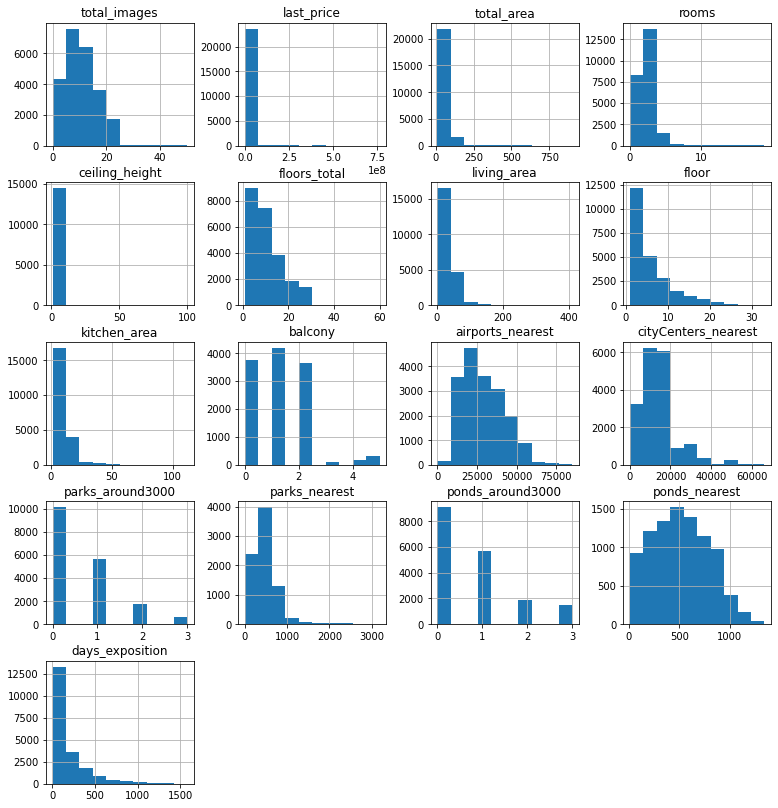

In [12]:
data.hist(figsize=(13,14))

Таблица с данными состоит из 23698 строк и 22 столбцов,при этом целочисленный формат int64 имеет 3 столбца,float64 - 14 столбцов, bool - 2 столбца, object - 3 столбца

По итогу первого анализа выявлено:
* Столбцы cityCenters_nearest, parks_around3000, ponds_around3000 необходимо переписать в змеином регистре.
* Явные дубликаты отсутствуют.
* Тип данных столбца *first_day_exposition* необходимо обратить в объект date,столбцы: *floors_total*,*balcony* и *living_area* должны быть целочисленного формата(int64),а столбец *is_apartment* должен быть типа bool.
* В датафрейме есть пропуски, которые могут быть вызваны и 'человеческим фактором' и технической ошибкой,так например, в столбце *airports_nearest* есть пропуски,хотя эти значения брались на основе картографических данных геосервисов. Также в данных присутствуют пропуски в столбцах,которые заполнял сам пользователь.
* Благодаря гистограмам, можно сказать что данные не особо качественные, так в гистограмме столбца *rooms* есть квартиры в которых 0 комнат,нужно будет перепроверить данные

Разберем что за столбцы и какую информацию они в себя включают:
* *total_images* - число фотографий квартиры;
* *total_area* - общая площадь квартиры в кв.м.;
* *first_day_exposition* - дата публикации;
* *rooms* - число комнат в квартире;
* *ceiling_height* - высота потолков в метрах;
* *floors_total* - количество этажей в доме;
* *living_area* - жилая площадь в кв.м.;
* *floor* - этаж;
* *is_apartment* - аппартаменты;
* *studio* - студия;
* *open_plan* - свободная планировка;
* *kitchen_area* - площадь кухни в кв.м.;
* *balcony* - количество балконов;
* *locality_name* - название населенного пункта;
* *airports_nearest* - расстояние до ближайшего аэропорта в метрах;
* *cityCenters_nearest* - расстояние до центра города в метрах;
* *parks_around3000* - число парков в радиусе 3 км;
* *parks_nearest* — расстояние до ближайшего парка в метрах;
* *ponds_around3000* — число водоёмов в радиусе 3 км;
* *ponds_nearest* — расстояние до ближайшего водоёма (м);
* *days_exposition* — сколько дней было размещено объявление.



  

## Выполните предобработку данных

### Сделаем змеиный регистр в столбцах 

In [13]:
#Поменяем в змеиный регистр
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data = data.rename(columns={'parks_around3000':'parks_around_3000'})
data = data.rename(columns={'ponds_around3000':'ponds_around_3000'})

**Заполним пропуски для ceiling_height медианным значением,что поможет избежать влияния выбросов**

In [14]:
#Заполним пропуски для ceiling_height
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].sort_values()

22590      1.00
5712       1.20
16934      1.75
20520      2.00
552        2.00
          ...  
20478     27.00
21377     27.50
3148      32.00
22336     32.00
22869    100.00
Name: ceiling_height, Length: 23699, dtype: float64

*Присутствуют явные ошибки при замене,запятая сместилась,скорректируем данные*

In [15]:
data.loc[data['ceiling_height']>=13 ,'ceiling_height'] = data['ceiling_height']/10
print(data['ceiling_height'].sort_values(ascending=False))
print('Количество пропусков:',data['ceiling_height'].isna().sum())

22309    10.30
22869    10.00
5863      8.30
17442     8.00
3474      8.00
         ...  
20520     2.00
16934     1.75
15061     1.40
5712      1.20
22590     1.00
Name: ceiling_height, Length: 23699, dtype: float64
Количество пропусков: 0


**Заполним пропуски для столбца floors_total**

Сделаем функцию и применем ее к столбцу floors_total для точного заполнения пропущенных значений,медианное значение не подходит,так как может получится так,что квартира находится на этаже,которого нет в доме. Будем использователь столбец floor

In [16]:
# Если значение floors_total больше или равно 0, функция будет возвращать 0
def floors_total(i):
    if i['floors_total'] >= 0:
        return 0
    else:
        return data[data['floor'] == i['floor']]['floors_total'].median() # Если значение меньше 0, функция ищет медиану floors_total для всех строк, где значение в столбце floor совпадает с текущим значением floor в строке. Это позволяет заполнить пропуски медианой по этажам.
data['func'] = data.apply(floors_total, axis=1) # Применим функцию и сохраним в новом столбце
data['floors_total'] = data['floors_total'].fillna(0) #На этом этапе заполним пропуски нулями,после изменим
data['floors_total'] = (data['func'] + data['floors_total']).astype('int') # Добавим значения из ранее добавленного столбца, а после преобразуем в int64
data.drop('func', axis=1, inplace=True) #Удалим столбец
print('Количество пропусков в столбце floors_total:',data['floors_total'].isna().sum())

Количество пропусков в столбце floors_total: 0


**Заполним пропуски для столбца living_area**

Сгруппируем данные по количеству комнат,а после рассчитаем среднюю площадь для каждой группы,в итоге заполним этим значением жилую площадь

In [17]:
#группировка по кол-ву комнат
mean_living_area_by_rooms = data.groupby('rooms')['living_area'].mean()

# Функция для заполнения пустых значений
def fill_living_area(row):
    if pd.isna(row['living_area']):
        return mean_living_area_by_rooms[row['rooms']]
    return row['living_area']
#Применим функцию
data['living_area'] = data.apply(fill_living_area, axis=1)
print('Количество пропусков:',data['living_area'].isna().sum())

Количество пропусков: 0


Проверим,не превышает ли сумма кухонной и жилой площади, всю площадь квартиры.

In [18]:
data['check'] = (data['kitchen_area'] + data['living_area']) > data['total_area']
all_false = data['check'].all() == False
print('Не превышает ли сумма кухонной и жилой площади, всю площадь:',all_false)
data.drop('check', axis=1, inplace=True)

Не превышает ли сумма кухонной и жилой площади, всю площадь: True


Заполнить пропуски для столбца kitchen_area невозможно. Данных недостаточно для заполнения никаким из способов. Взаимосвязь жилой площади и общей площади,конечно,имеется,но стоит учитывать что нет информации по объектам,которые не входят в жилую площадь,например сан.узел,гардеробные и коридоры.

**Хорошим решением будет заполнить пропуски значением 0,например,может быть пользователь не заполнил значение из-за того что,его квартира - студия**

In [19]:
print('Коэффицент корреляции:',data['kitchen_area'].corr(data['living_area']))
print('Коэффицент корреляции:',data['kitchen_area'].corr(data['total_area']))

Коэффицент корреляции: 0.42448339897424375
Коэффицент корреляции: 0.6091211711198318


Посмотрим сколько строк, где значение kitchen_area будет равно 0,а квартира - True

In [20]:
filtered_rows = data[(data['kitchen_area'].isnull()) & (data['studio'] == True)]
# Подсчет количества таких строк
count = filtered_rows.shape[0]
print(count)

149


Гипотеза подтвердилась,зависимость между этими значениями имеется. Конечно,таких значений мало по сравнению с общим количеством пропуском,но нам ничего не остается как заполнить пропуски нулями.

In [21]:
data['kitchen_area']=data['kitchen_area'].fillna(0)
print('Количество пропусков:',data['kitchen_area'].isna().sum())

Количество пропусков: 0


**Заполним пропуски для столбца is_apartment**

In [22]:
#Найдем количествол значений False для дальнешего анализа
print('Количество False:',(data['is_apartment']==False).sum())
print('Количество True:',(data['is_apartment']==True).sum())

Количество False: 2725
Количество True: 50


Замена пропусков будет осуществляться на значение False,так как, большинство значений - False и скорее всего пользователь просто не заполнял столбец.

In [23]:
data['is_apartment']= data['is_apartment'].fillna(False)
print('Количество пропусков:',data['is_apartment'].isna().sum())

Количество пропусков: 0


**Заполним пропуски для столбца balcony**

Замена пропусков будет осуществляться на значение 0,так как,скорее всего пользователь, у которого нет балкона, просто не заполнял столбец.

In [24]:
data['balcony']=data['balcony'].fillna(0)
print('Количество пропусков:',data['balcony'].isna().sum())

Количество пропусков: 0


**Заполним пропуски в locality_name**

Пропущенные значения следует убрать, в связи с тем,что нет никакой информации и связи с другими столбцами,при этом медианное или среднее значение может неправильно повлиять на данные.

In [25]:
data = data.dropna(subset=['locality_name'])
print('Количество пропусков:',data['locality_name'].isna().sum())

Количество пропусков: 0


**Заполним пропуски в столбцах city_center_nearest,airports_nearest,parks_around3000,ponds_around3000,parks_nearest,ponds_nearest,days_exposition**

В данных столбцах пропуски в значениях скорее всего связаны с самими картографическими данными и означают что объекта либо нет рядом либо он находится слишком далеко.

**Учитывая эти выводы,оставим данные неизменными**

Незаполненные пропуски в days_exposition скорее всего указывают, что объект не продан.

### Изменим тип данных для каждого столбца

In [26]:
data[['floors_total', 'balcony', 'living_area']] = data[['floors_total', 'balcony', 'living_area']].astype('int64')

In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [28]:
data['is_apartment'] = data['is_apartment'].astype('bool')

### Найдем неявные дубликаты и устраним их

**Рассмотрим уникальные значения**

In [29]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [30]:
# Присутствуют неявные дубликаты,для их удаления сначала переведем строки в нижний регистр
data['locality_name'] = data['locality_name'].str.lower()
# Заменим дубликаты
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'село ', 'станции', 'городского типа', 'пансионат',
             'городской поселок', 'деревня'], '', regex=True)
    )
# Снова проверим уникальные значения 
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'городской янино-1', 'парголово',
       'мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       ' кудрово', 'коммунар', 'колпино', ' красный бор', 'гатчина',
       ' федоровское', 'выборг', 'кронштадт', 'кировск',
       ' новое девяткино', 'металлострой', ' лебяжье', ' сиверский',
       'молодцово', ' кузьмоловский', 'новая ропша', 'павловск',
       ' пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', ' куттузи', 'аннино', ' ефимовский', 'плодовое',
       ' заклинье', 'торковичи', 'первомайское', 'красное село',
       'понтонный', 'сясьстрой', ' старая', ' лесколово', 'новый свет',
       'сланцы', 'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', ' оржицы', ' кальтино', 'кудрово',
       'романовка', 'бугры', ' рощино', 'кириши', 'луга', 'волосово',
       'отрадное', 'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин',
       'победа', ' нурма', ' синявино

In [34]:
def filter_localities_starting_with_capital(data, column_name='locality_name'):
    filtered_data = data[data[column_name].str[0].str.isupper()]
    filtered_data[column_name] = filtered_data[column_name].str.replace('е', 'ё', regex=False)
    return filtered_data
data = filter_localities_starting_with_capital(data)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

**Неявных дубликатов более не присутствует.**

### Вывод предобработки данных

В результате проведенной обработки данных были достигнуты поставленные цели: пропуски заполнены там, где это было возможно,изменены типы данных,удалены неявные дубликаты и изменены названия столбцов в змеиный регистр. Однако следует отметить, что значительная часть данных, способных повлиять на итоговую статистику и принять решение о приобретении квартир, была утеряна при выгрузке таблицы или отсутствует. Об этом необходимо обязательно уведомить ответственных сотрудников, занимающихся выгрузкой и сбором данных.

## Добавьте в таблицу новые столбцы

**Цена одного квадратного метра**

In [ ]:
data['price_for_sqr_meter']=(data['last_price']/data['total_area']).round(2)

**День недели, месяц, год публикации объявления**

In [ ]:
#День недели
data['day_publish'] = data['first_day_exposition'].dt.weekday
#Месяц
data['month_publish'] = data['first_day_exposition'].dt.month
#Год
data['year_publish'] = data['first_day_exposition'].dt.year

**Разделим на группы этажи: другой,первый и последний**

In [ ]:
def floor(i):
    if i['floor'] == i['floors_total']:
        return 'последний'
    if i['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor,axis=1)

**Расстояние до центра города в километрах**

In [ ]:
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0)

**Итоговая таблица с новыми столбцами**

In [ ]:
data.head()

## Проведите исследовательский анализ данных

### Изучим параметры

**Будем изучать данные параметры:**
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка


**Исследовать стоит зависимость количества квартир,находящихся в продаже от их параметров:**

**Анализ общей площади**

In [ ]:
data['total_area'].describe()

Оставим значения от минимального 12 и до 120 квадратных метров

In [ ]:
plt.hist(data['total_area'], bins=100,range=(0,120))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('м^2')
plt.ylabel('Кол-во квартир')
plt.xticks(np.arange(0, 120, 10))
plt.yticks(np.arange(0, 1100, 100))
plt.show()

**Вывод:**

Большинство квартир на рынке имеют площадь от *32* квадратных метров и до *61*, при этом больше всего квартир (около 980) имеют площадь *44* квадратных метра

**Анализ жилой площади**

In [ ]:
data['living_area'].describe()

Оставим значения от минимального 2 и до 60p квадратных метров

In [ ]:
plt.hist(data['living_area'],bins=100,range=(2,60))
plt.title('Зависимость квартир в продаже от жилой площади')
plt.xlabel('м^2')
plt.ylabel('Количество квартир')
plt.xticks(np.arange(2, 70, 5))
plt.yticks(np.arange(0, 2400, 100))
plt.show()

**Вывод:**

Большинство квартир имеют жилую площадь в диапозоне от 15 до 32 квадратных метров,больше всего предложений с жилой площадью в 16 квадратных метров,а также наблюдается спад количества квартир с площадью 23 квадратных метра.



**Анализ площади кухни**

In [ ]:
data['kitchen_area'].describe()

Оставим значения от 0 до 30 квадратных метров

In [ ]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Больше всего квартир с площадью кухни от 5 до 15 квадратных метров. Больше 20 метров кухни практически не встречаются,при этом всплеск показывает,что множество квартир имеют площадь 1 квадратный метр

**Анализ последней цены**

In [ ]:
data['last_price'].describe()

In [ ]:
plt.hist(data['last_price'], bins=120, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость квартир в продаже от последней цены')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Наибольшее количество квартир на продаже имели или имеют цену от 3 до 4,5 млн. рублей.

**Анализ высоты потолков**

In [ ]:
data['ceiling_height'].describe()

Воспользуемся срезом данных,чтобы не учитывать слишком высокие или низкие потолки

In [ ]:
plt.hist(data.query('(ceiling_height < 4) & (ceiling_height > 2)')['ceiling_height'], bins=30, range=(2.5,3))
plt.title('Зависимость квартир в продаже от высоты потолка')
plt.xlabel('Высота потолка в м')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Большинство квартир имеют потолки высотой 2.65 метра,незначительное количество квартир имеют высоту потолков 2.5,2,6,2.7,2.8 метров.

**Анализ типов этажей**

In [ ]:
data['floor_type'].describe()

In [ ]:
plt.hist(data['floor_type'],bins = 5)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('количество квартир')
plt.show()

**Вывод:**

Большинство квартир выставленных на продажу не находятся ни на первом этаже ни на последнем,что довольно логично, людям просто неудобно жить на этих этажах.

**Анализ количества комнат**

In [ ]:
data['rooms'].describe()

Оставим значения от 0 до 6 квартир (может кто-то указал 0 комнат вместо того,чтобы указать студию).

In [ ]:
plt.hist(data['rooms'],bins=10,range=(0,8))
plt.title('Зависимость квартир в продаже от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Больше всего квартир,находящихся на продаже, имеют от 1 до 3 комнат,чем больше комнат в квартире,тем меньше квартир на продаже.

**Анализ общего количества этажей в доме**

In [ ]:
data['floors_total'].describe()

In [ ]:
plt.hist(data['floors_total'],bins=30)
plt.title('Зависимость квартир на продаже от количества этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Большинство квартир на продаже находятся в домах,состоящих из 5 и 10 этажей. Меньше всего домов, в которых продаются квартиры имеют свыше 20 этажей.

**Анализ расстояния до центра города**

In [ ]:
data['city_centers_nearest'].describe()

In [ ]:
plt.hist(data['city_centers_nearest'], bins=50, range=(0,25000))
plt.title('Зависимость квартир в продаже от удаленности от центра города')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Наибольшее количество предложений о продаже квартир наблюдается в спальных районах на окраинах города (на расстоянии 12000 - 15000 метров), а также отмечается значительный всплеск на расстоянии 5000 метров от центра города.

**Анализ расстояния до ближайшего парка**

In [ ]:
data['parks_nearest'].describe()

In [ ]:
plt.hist(data['parks_nearest'], bins=80, range=(100,800))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до парка в метрах')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**

Количество предложений не имеет значительной зависимости от расстояния до ближайшего парка, которое в среднем составляет примерно 200 - 700 метров.

**Общий вывод по анализу параметров,влияющих на количество квартир на рынке**

Среднестатистическая квартира,находящияся на продаже имеет следующие параметры:
* Площадь квартиры от 32 до 61 квадратных метра
* Жилая площадь квартиры от 15 до 32 квадратных метра
* Площадь кухни в квартире от 5 до 15 квадратных метров
* Цена квартиры варьируется от 3 до 4,5 млн. рублей
* Высота потолков 2,65 метра
* Квартира не находится ни на первом ни на последнем этаже
* Комнат в квартире от 1 до 3
* Дома,в которых находятся квартиры,состоят либо из 5 либо из 10 этажей
* Квартиры находятся на расстоянии 12000-15000 метров от центра
* Квартиры находятся на расстоянии 200-700 метров от парка

### Изучим как быстро продавались квартиры

Рассчитаем среднее и медиану и остальные данные:

In [ ]:
data['days_exposition'].describe()

Построим гистограмму

In [ ]:
plt.hist(data['days_exposition'],bins=100,range=(1,400))
plt.title('Количество проданных квартир за промежутки времени')
plt.xlabel('Количество дней')
plt.ylabel('Количество проданных квартир')
plt.show()

**Вывод**

Рассчеты по среднему,говорят нам о том,что квартира продается в течение 180 дней,а рассчитанная медина,говорит о том,что квартира продается за 95 дней,при этом,можно сделать вывод,что в среднем больше всего квартир продается за 100-180 дней (2-3 месяца), а сама продажа зависит от параметров изученных ранее. Также в данных наблюдается тенденция на уменьшение проданных квартир с увеличением дней продажи,можно сделать вывод, что чем хуже квартира,тем дольше она будет продаваться. Быстрыми продажами можно считать продажи состоявшиеся за 45 днней (в первом квартиле), а необычно долгие продажи после 231 дня и более (после 3 квартиля), которые вообще могут быть не проданны.


### Определим какие факторы больше всего влияют на полную стоимость объекта

**Изучим данные параметры:**
* общая площадь
* жилая площадь
* площадь кухни
* количество комнат
* этаж, на котором расположена квартира (первый, последний, другой)
* дата размещения (день недели, месяц, год)

**Построим таблицу корреляций,так будет легче ориентироваться и примерно понимать где зависимость есть,а где она отсутствует**

In [ ]:
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','day_publish','month_publish','year_publish']).corr())

С типом этажей проведем операции позже

**Зависимость цены от общей площади**

Построим сводную таблицу

In [ ]:
price_total_area=data.pivot_table(index='total_area',values='last_price')
print(price_total_area)

In [ ]:
price_total_area.plot(style='o',grid=True, figsize=(10, 5), title='График зависимости цены от площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена')
plt.xlim(0,100)
plt.ylim(0,13000000)
plt.show()

Видно,что есть почти прямая зависимость между ценой и площадью квартиры,параметры коррелируют.

**Зависимость цены от жилой площади**

Построим сводную таблицу

In [ ]:
price_living_area = data.pivot_table(index='living_area',values='last_price')
print(price_living_area)

In [ ]:
price_living_area.plot(style = 'o',grid=True,figsize=(5, 5), title='График зависимости цены от жилой площади')
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Цена')
plt.xlim(0,100)
plt.ylim(0,13000000)
plt.show()

По графику сложно определить есть ли зависимость между данными,таблица корреляции,приведенная ранняя,помогает подтвердить, что цена имеет зависимость от жилой площади.

**Зависимость цены от площади кухни**

Построим сводную таблицу

In [ ]:
price_kitchen_area = data.pivot_table(index='kitchen_area',values='last_price')
print(price_kitchen_area)

In [ ]:
price_kitchen_area.plot(style = 'o',grid=True,figsize=(10, 5), title='График зависимости цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.xlim(0,30)
plt.ylim(0,13000000)
plt.show()

Учитывая коэффицент корреляции и график можно сказать что у цены с площадью кухни имеется слабая зависимость

**Зависимость цены от количества комнат в квартире**

Построим сводную таблицу

In [ ]:
price_rooms = data.pivot_table(index='rooms',values='last_price')
print(price_rooms)

In [ ]:
price_kitchen_area.plot(style = 'o',grid=True,figsize=(10, 5), title='График зависимости цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.xlim(0,50)
plt.ylim(0,25000000)
plt.show()

Наблюдается сильная зависимость между ценой и количеством комнат в квартире

**Зависимость цены от типа этажа**

Построим сводную таблицу

In [ ]:
price_type_floor = data.pivot_table(index='floor_type',values='last_price',aggfunc='sum')
print(price_type_floor)

In [ ]:
price_type_floor.plot(style='o-',figsize=(10,7))
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

Зависимость отсуствует.

**Зависимость цены от года,месяца,дня публикации**

Построим сводные таблицу

In [ ]:
price_year = data.pivot_table(index = 'year_publish',values = 'last_price')
price_month = data.pivot_table(index = 'month_publish',values = 'last_price')
price_day = data.pivot_table(index = 'day_publish', values = 'last_price')
print(price_year)
print()
print(price_month)
print()
print(price_day)

In [ ]:
price_year.plot(style='o-',figsize=(10,7))
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

In [ ]:
price_month.plot(style='o-',figsize=(10,7))
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

In [ ]:
price_day.plot(style='o-',figsize=(10,7))
plt.title('Зависимость цены от дня')
plt.xlabel('День')
plt.ylabel('Цена')
plt.show()

Слабая зависимость присуща только дням.

**Вывод**

* **Почти** прямая зависимость имеется у таких параметров, как общая площадь, жилая площадь и количество комнат в квартире,при этом слабая зависимость наблюдается и с днем публикации и с площадью кухни. Другие параметры не имеют зависимости с ценой.
* Количество комнат, жилая площадь и общая площадь связаны между собой,здесь работает логика: больше комнат,следовательно больше жилая площадь,следовательно больше общая площадь,при этом стоит учитывать,что могут быть и варианты,что квартира находится близко к центру города,поэтому квартиры даже с меньшим количеством комнат,могут стоить дороже по сравнению с окраиной.
* Наибольшая корреляция присутствует у параметров цены и общей площади,так как цена изначально строится из стоимости за один квадратный метр.
* Никакой зависимости между годом и месяцем и ценой нет,при этом присутствует взаимосвязь дня публикации и цены,пик цены доходит в субботу,данную зависимость сложно объяснить.
* Квартиры, находящиеся на первом этаже имеют минимальную стоимость,наибольшую стоимость имеют квартиры которые находятся ни на последнем ни на первом,при этом квартиры на последнем этаже имеют цену чуть больше,чем цена для квартир на первом этаже.
  

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

In [ ]:
price_top = data.pivot_table(index='locality_name',values='last_price',aggfunc=('count')) #сводная таблица с количеством объявлений
price_top.columns=['count'] 
price_top = price_top.sort_values(by='count',ascending=False) # Отсортируем данные,чтобы вывести топ 10 городов по кол-ву объявлений
price_top = price_top.head(10)
price_top['price_square_meter'] = data.pivot_table(index='locality_name', values='price_for_sqr_meter').round(2)
price_top
price_top.sort_values(by='price_square_meter', ascending=False) # Отсортируем данные,чтобы вывести среднюю цену квадратного метра для городов


**Вывод:**
* Наибольшая стоимость за квадратный метр в Санкт-Петебурге и составляет 114849.01 рублей.
* Наименьшая стоимость за квадратный метр в Выборге и составляет 58141.91 рублей.
* Наименьшую стоимость за квадратный метр имеют города: Всеволожск,Гатчина,которые располагаются вдалеке от Санкт-Петербурга.
* Города,находящиеся в Ленинградской области, но при этом,находящиеся близь Санкт-Петербурга имеют среднюю стоимость за квадратный метр - от 75 тысяч до 92 тысяч. 

### Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра. 

Построим сводную таблицу с данными о зависимости изменения цены от удаленности от центра 

In [ ]:
city_center_nearest_spb = data.query('locality_name=="санкт-петербург"')
city_center_nearest_spb = city_center_nearest_spb.pivot_table(index='distance_city_center',values='last_price')
city_center_nearest_spb

Для более наглядного анализа,построим график.

In [ ]:
city_center_nearest_spb.plot(figsize=(10,5),style='--o',grid=True)
plt.xlim(0,15)
plt.title('Средняя стоимость квартир на разном расстоянии от центра')
plt.xlabel('Расстояние в километрах')
plt.ylabel('Цена')
plt.show()

**Вывод:**
* Логично,самые дорогие квартиры оказались в центре Санкт-Петербурга,снижение цены по средству увеличения расстояния происходит до отметки в 8 км,после цена не зависит от расстояния до центра города.

## Общий вывод

В ходе исследования объявлений о продаже квартир в ленинградской области были выполнены следующие шаги:
* 1 Был изучен датасет
  * В данных 23699 записей и 22 столбца,при этом при первичном анализе были выявлены проблемы с регистром,типом данных и пропусками.
* 2 Была выполнена предобработка данных
  * Пропуски были заполнены,где это было возможно
  * Изменены типы данных
  * Удалены неявные дубликаты
  * Изменены названия столбцов в змеиный регистр
  * Был сделан вывод, что значительная часть данных, способных повлиять на итоговую статистику и принять решение о приобретении квартир, была утеряна при выгрузке таблицы или отсутствует.
* 3 Добавлены новые столбцы в таблицу для проведения следующих шагов
  * price_for_sqr_meter
  * day_publish
  * month_publish
  * year_publish
  * floor_type
  * distance_city_center
* 4 Проведен исследовательский анализ данных
  * Изучены параметры,влияющие на количество квартир в объявлении.
      * Сделан вывод,что обычно квартира,выставленная на продажу,имеет площадь около 44 квадратных метров, жилую площадь - 16 метров, кухню площадью 8 метров,стоит около 4,5 млн.рублей,высота потолков в квартире 2.65 метров, при этом комнат в квартире должно быть от 1 до 3,а также квартира находится в среднем на расстоянии 12000-15000 метров от центра города и 200-700 метров от парка.
  * Изучено как быстро продавались квартиры
      * Квартира продается в течение 180 дней,а рассчитанная медина,говорит о том,что квартира продается за 95 дней,при этом,можно сделать вывод,что в среднем больше всего квартир продается за 100-180 дней (2-3 месяца).
      * Чем хуже квартира,тем дольше она будет продаваться.
      * Быстрой продажей можно назвать сделку,совершенную за 45 дней и менее,необычайно долгими являются продажи совершенные от 231 дней,все же большинство квартир продаются до 180 дней.
  * Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта
      * Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.
      * Количество комнат, жилая площадь и общая площадь связаны между собой,здесь работает логика: больше комнат,следовательно больше жилая площадь,следовательно больше общая площадь,при этом стоит учитывать,что могут быть и варианты,что квартира находится близко к центру города,поэтому квартиры даже с меньшим количеством комнат,могут стоить дороже по сравнению с окраиной.
      * Квартиры, находящиеся на первом этаже имеют минимальную стоимость,наибольшую стоимость имеют квартиры которые находятся ни на последнем ни на первом,при этом квартиры на последнем этаже имеют цену чуть больше,чем цена для квартир на первом этаже.
      * Никакой зависимости между годом и месяцем и ценой нет,при этом присутствует взаимосвязь дня публикации и цены,пик цены доходит в субботу,данную зависимость сложно объяснить.
  * Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
      * Наибольшая стоимость за квадратный метр в Санкт-Петебурге и составляет 114849.01 рублей.
      * Наименьшая стоимость за квадратный метр в Выборге и составляет 58141.91 рублей.
      * Малую стоимость за квадратный метр имеют города: Всеволожск,Гатчина,которые располагаются вдалеке от Санкт-Петербурга.
      * Города,находящиеся в Ленинградской области, но при этом,находящиеся близь Санкт-Петербурга имеют среднюю стоимость за квадратный метр - от 75 тысяч до 92 тысяч.
  * Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга
      *  Cамые дорогие квартиры оказались в центре Санкт-Петербурга,снижение цены по средству увеличения расстояния происходит до отметки в 8 км,после цена не зависит от расстояния до центра города.